# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')
% matplotlib inline
## Load the data into a DataFrame
df = pd.read_csv("../Assets/Project3/Iowa_Liquor_sales_sample_10pct.csv")
## Transform the dates if needed, e.g.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")


In [3]:
df.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [4]:
print 'The data set contains: %r rows and %r columns' % (df.shape[0],df.shape[1])
df.columns

The data set contains: 270955 rows and 18 columns


Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [5]:
df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

The output shows us that we're working with a set of 270k records and 18 columns. Several of the column variables are encoded as numeric data types (int64 and float64) but a few of them are encoded as "object". Of those enconded as "object", State Bottle Cost and Retail as well as Sale (Dollars) should be transformed into "float64" type.

In [6]:
df[u'State Bottle Cost'] = df[u'State Bottle Cost'].apply(lambda x: x.lstrip('$'))
df[u'State Bottle Retail'] = df[u'State Bottle Retail'].apply(lambda x: x.lstrip('$'))
df[u'Sale (Dollars)'] = df[u'Sale (Dollars)'].apply(lambda x: x.lstrip('$'))
df[u'State Bottle Cost'] = df[u'State Bottle Cost'].apply(lambda x: float(x))
df[u'State Bottle Retail'] = df[u'State Bottle Retail'].apply(lambda x: float(x))
df[u'Sale (Dollars)'] = df[u'Sale (Dollars)'].apply(lambda x: float(x))

In [7]:
# There are some null values which are going to be dropped
df.isnull().any()
df=df.dropna()

In [8]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,City,Zip Code,County,Category Name,Item Description
count,269258,269258,269258,269258,269258
unique,382,412,99,71,2158
top,DES MOINES,50010,Polk,VODKA 80 PROOF,Black Velvet
freq,23618,7077,48944,35256,7208


In [9]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,269258.000000,269258.000000,2.692580e+05,269258.00000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000
mean,3587.695311,57.229642,1.043866e+06,256.36045,45944.813164,925.217375,9.763293,14.660848,9.874028,128.828546,8.991069,2.375397
std,946.505088,27.338810,5.021834e+04,140.98313,52557.185155,492.837459,7.039787,10.559164,24.072335,383.477046,28.963204,7.651262
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,5.500000,8.250000,2.000000,30.420000,1.500000,0.400000
50%,3721.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,8.000000,12.110000,6.000000,70.560000,5.250000,1.390000
75%,4376.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Number,1.000000,0.007724,-0.012263,-0.005079,-0.026459,-0.062526,-0.071294,-0.071430,0.014662,-0.017750,-0.017375,-0.017364
County Number,0.007724,1.000000,-0.006303,0.001717,0.006898,-0.027864,0.012032,0.011958,0.018950,0.019775,0.010185,0.010194
Category,-0.012263,-0.006303,1.000000,0.091512,0.116619,-0.009055,-0.013571,-0.013758,-0.000080,0.006542,-0.004192,-0.004183
Vendor Number,-0.005079,0.001717,0.091512,1.000000,0.136183,0.025909,0.003616,0.003223,-0.002303,-0.012361,-0.007254,-0.007250
Item Number,-0.026459,0.006898,0.116619,0.136183,1.000000,-0.057681,0.096084,0.095815,-0.005021,0.002372,-0.010010,-0.010000
Bottle Volume (ml),-0.062526,-0.027864,-0.009055,0.025909,-0.057681,1.000000,0.312930,0.313911,-0.012183,0.082553,0.156141,0.155973
State Bottle Cost,-0.071294,0.012032,-0.013571,0.003616,0.096084,0.312930,1.000000,0.999960,-0.062832,0.135770,0.009301,0.009270
State Bottle Retail,-0.071430,0.011958,-0.013758,0.003223,0.095815,0.313911,0.999960,1.000000,-0.062684,0.135954,0.009742,0.009711
Bottles Sold,0.014662,0.018950,-0.000080,-0.002303,-0.005021,-0.012183,-0.062832,-0.062684,1.000000,0.825912,0.883972,0.884002
Sale (Dollars),-0.017750,0.019775,0.006542,-0.012361,0.002372,0.082553,0.135770,0.135954,0.825912,1.000000,0.846373,0.846385


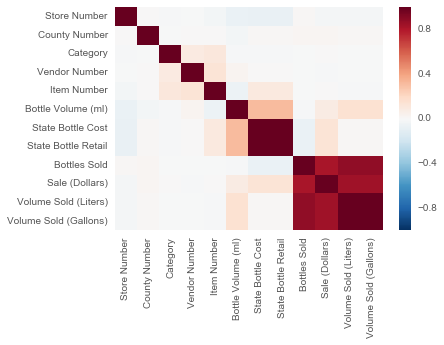

In [10]:
plt.figure(1)
sns.heatmap(df.corr());
df.corr()

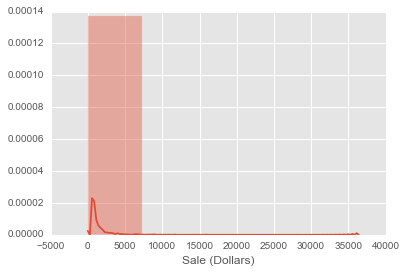

In [11]:
plt.figure(2)
sns.distplot(df['Sale (Dollars)'],bins=5);

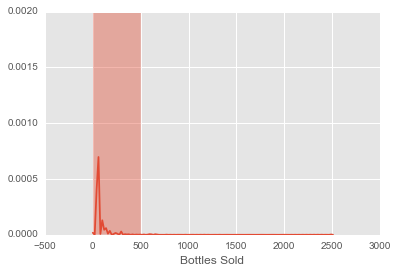

In [12]:
plt.figure(3)
sns.distplot(df['Bottles Sold'],bins=5);

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

Initial explorations of the 10% of the DataSet revealed the necessity to massage the data. First the data set contains 270955 rows and 18 columns. Most of the columns are integers while there are some which are categorical, aprevious tranformation we changed the Sales from an object type to a float64 type. This will allow us to do math with the numbers. One interesting aspect of the data set is that it contains several values that could be considered outliers. For example there is a single transaction that reached $30,000. For the purpose of this project I will not do anything about these outliers.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [13]:
df['Margin']=df["State Bottle Retail"]-df['State Bottle Cost']

df['Margin per Liter']=df['Margin']/df['Volume Sold (Liters)']

df = df.drop([u'County', u'Category',u'Volume Sold (Gallons)',u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold', u'Category Name',u'Bottle Volume (ml)', u'Vendor Number',
       u'Item Number', u'Item Description'],axis=1)

df.head()

,Date,Store Number,City,Zip Code,County Number,Sale (Dollars),Volume Sold (Liters),Margin,Margin per Liter
0,2015-11-04,3717,SUMNER,50674,9.0,81.00,9.0,2.25,0.250000
1,2016-03-02,2614,DAVENPORT,52807,82.0,41.26,1.5,6.88,4.586667
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,453.36,24.0,6.30,0.262500
3,2016-02-03,2501,AMES,50010,85.0,85.50,10.5,4.75,0.452381
4,2015-08-18,3654,BELMOND,50421,99.0,129.60,21.0,3.60,0.171429


In [14]:
#Total 2015 Sales
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2015 = df[mask]

# Group by store name
df2015 = df2015.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
df2015 = df2015.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Margin per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})

# Collapse the column indices
df2015.columns = [' '.join(col).strip() for col in df2015.columns.values]
#Rename Columns
df2015.columns = ['Store Number', 'City','Sales','Ave. Sale Price',
              'County Number','Zip Code','Ave. Margin per Liter','Volume Sold(L)',
              'Ave. Volume sold(L)','Margin']
df2015.head()

,Store Number,City,Sales,Ave. Sale Price,County Number,Zip Code,Ave. Margin per Liter,Volume Sold(L),Ave. Volume sold(L),Margin
0,2106,CEDAR FALLS,146038.70,277.640114,7.0,50613,0.932003,9719.85,18.478802,5.160951
1,2113,GOWRIE,9310.22,63.334830,94.0,50543,3.349160,659.85,4.488776,5.445102
2,2130,WATERLOO,111583.91,285.380844,7.0,50703,0.595482,6879.37,17.594297,4.918005
3,2152,ROCKWELL,7721.08,54.759433,17.0,50469,2.433972,633.37,4.491986,4.322624
4,2178,WAUKON,24324.18,102.633671,3.0,52172,2.335445,1917.12,8.089114,4.868861


In [15]:
# Quarter 1 Sales
# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
q1 = df[mask]
#Drop Repeated Columns leave Store Number to later Join to 2015
q1 = q1.drop([u'Date', 'City', 'Zip Code','County Number',
              'Volume Sold (Liters)','Margin','Margin per Liter' ],axis=1)
# Group Q1 by store name
q1 = q1.groupby(by=["Store Number"], as_index=False)
# Compute sum
q1 = q1.agg({"Sale (Dollars)": [np.sum]})
# Collapse the column indices
q1.columns = [' '.join(col).strip() for col in q1.columns.values]
# Rename columns
q1.columns = ['Store Number','Q1 Sales']
# Quick check
q1.head()

,Store Number,Q1 Sales
0,2106,39287.29
1,2113,2833.25
2,2130,24272.57
3,2152,2003.46
4,2178,5856.41


In [16]:
#Merging Q1 Sales to Total 2015 Data
df2015a = pd.merge(df2015, q1, how='left', on=['Store Number'])

In [17]:
#Checking for Null Values in our new data frame we found some stores that probably opened
#during 2015 so the best thing to do is to drop them.

df2015a=df2015a.dropna()
df2015a.count()

Store Number             1261
City                     1261
Sales                    1261
Ave. Sale Price          1261
County Number            1261
Zip Code                 1261
Ave. Margin per Liter    1261
Volume Sold(L)           1261
Ave. Volume sold(L)      1261
Margin                   1261
Q1 Sales                 1261
dtype: int64

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

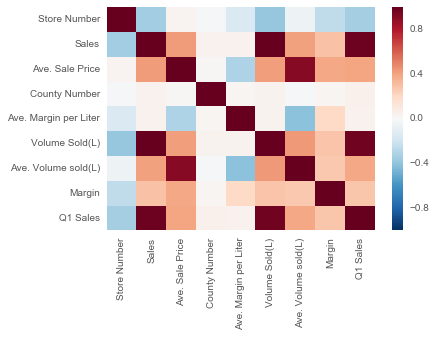

In [18]:
sns.heatmap(df2015a.corr())

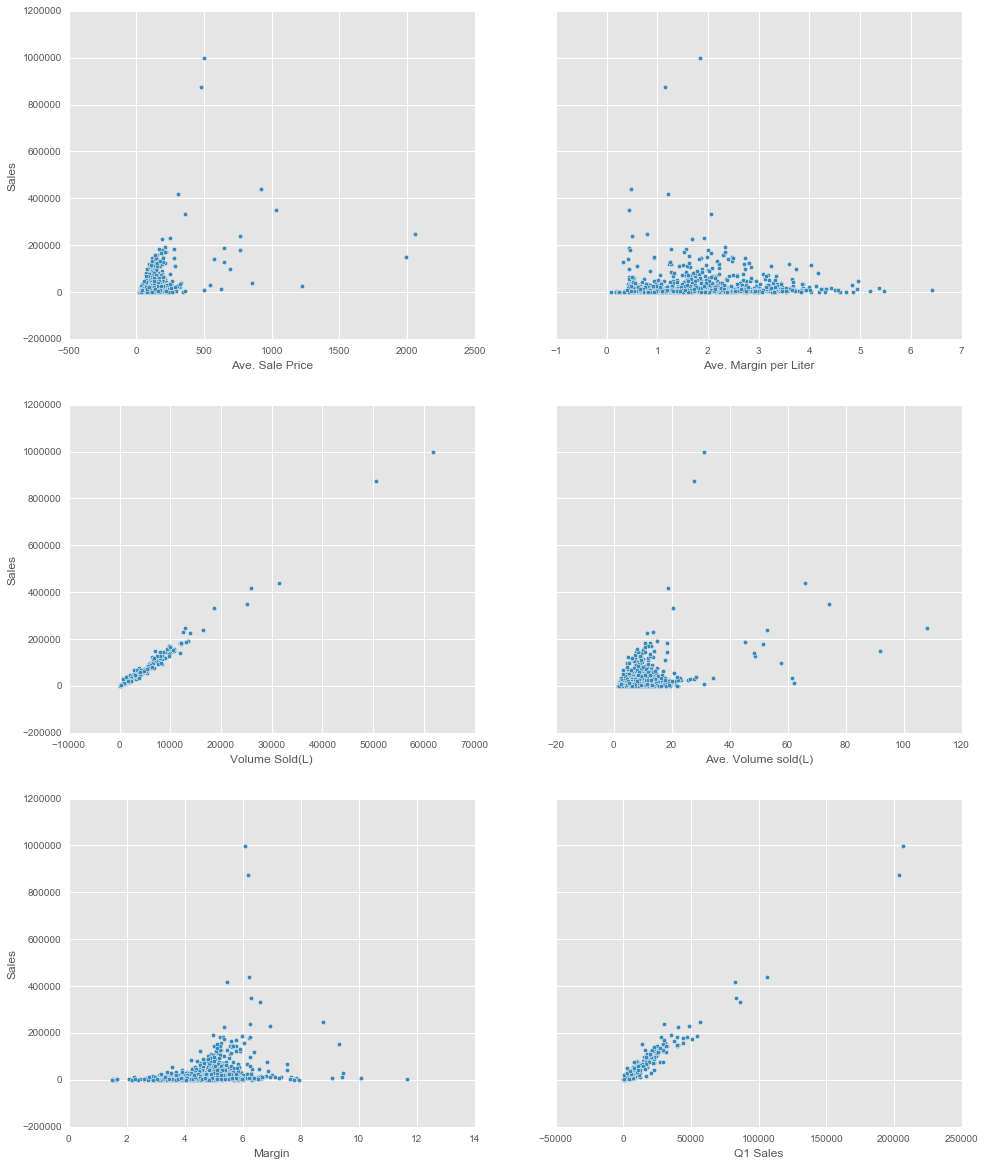

In [19]:
fig, axs = plt.subplots(3, 2, sharey=True, figsize= (16,20))
df2015a.plot.scatter(x= 'Ave. Sale Price', y= "Sales", ax=axs[0,0])
df2015a.plot.scatter(x= 'Ave. Margin per Liter', y= "Sales", ax=axs[0,1])
df2015a.plot.scatter(x= 'Volume Sold(L)', y= "Sales", ax=axs[1,0])
df2015a.plot.scatter(x= 'Ave. Volume sold(L)', y= "Sales", ax=axs[1,1])
df2015a.plot.scatter(x= 'Margin', y= "Sales", ax=axs[2,0])
df2015a.plot.scatter(x= 'Q1 Sales', y= "Sales", ax=axs[2,1])

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

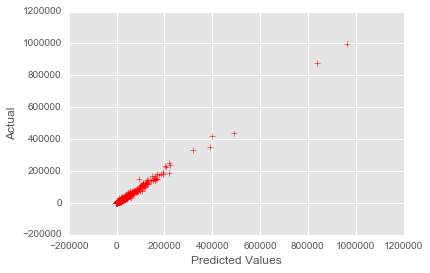

In [22]:
#Using sklearn Linear Model
from sklearn import linear_model
#Defining our dependent y15 variable and our independent variables X15
y15=df2015a['Sales']
X15=df2015a[['Q1 Sales','Volume Sold(L)']]
#Calling, fitting and predicting
lm= linear_model.LinearRegression()
model=lm.fit(X15,y15)
predictions15 = lm.predict(X15)
#Plotting out predictions
plt.scatter(predictions15, y15, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual")

plt.show()

Cross-validated scores: [ 0.98776268  0.98107776  0.93165175  0.94307753  0.99092443  0.95373004]
Cross-Predicted Accuracy: 0.988138094405


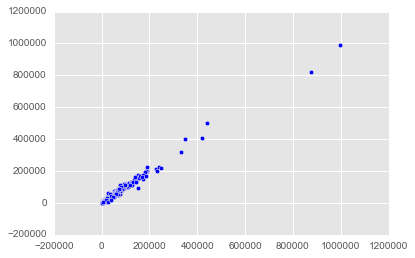

In [51]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, df2015a[['Q1 Sales','Volume Sold(L)']], y15, cv=6)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model,df2015a[['Q1 Sales','Volume Sold(L)']], y15, cv=6)
plt.scatter(y15, predictions)
accuracy = metrics.r2_score(y15, predictions)
print "Cross-Predicted Accuracy:", accuracy


In [24]:
#Using Stats Model
import statsmodels.formula.api as smf

#formula = 'outcome ~ predictor1 + predictor2 ... predictor 
lm1 = smf.ols(formula='y15 ~ X15', data=df2015a).fit()

#print the full summary
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y15   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.031e+04
Date:                Fri, 24 Jun 2016   Prob (F-statistic):               0.00
Time:                        09:29:52   Log-Likelihood:                -12613.
No. Observations:                1261   AIC:                         2.523e+04
Df Residuals:                    1258   BIC:                         2.525e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1604.5789    166.856     -9.617      0.000     -1931.925 -1277.232
X15[0]         1.3627      0.056     24.263      0.000         1.253     1.473
X15[1]        11.0754      0.195     56.790      0.000        10.693    11.458
==============================================================================
Omnibus:                      367.152   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40150.869
Skew:                           0.027   Prob(JB):                         0.00
Kurtosis:                      30.644   Cond. No.                     1.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our R^2 Value is quite good, according to this model, we should be able to predict 2016 sales based on q1 sales.

In [25]:
# 2016 Quarter 1 Sales
# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2016q1 = df[mask]

#Drop unwanted columns
df2016q1 = df2016q1.drop([u'Date', 'City', 'Zip Code','County Number',
              'Margin','Margin per Liter' ],axis=1)

# Group Q1 by store name
df2016q1 = df2016q1.groupby(by=["Store Number"], as_index=False)

# Compute sum
df2016q1 = df2016q1.agg({"Sale (Dollars)": [np.sum],
            'Volume Sold (Liters)':[np.sum]})
# Collapse the column indices
df2016q1.columns = [' '.join(col).strip() for col in df2016q1.columns.values]
# Rename columns
df2016q1.columns = ['Store Number','Q1 Sales','Volume Sold (Liters)']
# Quick check
df2016q1.head()

,Store Number,Q1 Sales,Volume Sold (Liters)
0,2106,30478.75,2116.25
1,2113,2065.90,177.00
2,2130,27856.11,1556.90
3,2152,904.66,87.50
4,2178,5588.50,520.80


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [33]:
#Here we used a model created to predict 2016 sales using Q1 Data

X16=df2015a[['Q1 Sales','Volume Sold(L)']]
predictions16 = lm.predict(X16)
predictions16b = lm1.predict(X16)

Sales2016=sum(predictions16)
Sales2015=df2015['Sales'].sum()

print 'The Total sales for 2015: $%d' %Sales2015
print "The Projected Sales for 2016: $%d" %Sales2016



The Total sales for 2015: $28478661
The Projected Sales for 2016: $27816516


In [46]:
change= (Sales2016-Sales2015)/Sales2015*100
print 'Accroding to the model and using the Q1 data for 2016 sales are projected to decrease by: \n %d percent'% abs(change)

Accroding to the model and using the Q1 data for 2016 sales are projected to decrease by: 
 2 percent
